In [41]:
import pandas as pd
import numpy as np
from darts import TimeSeries
from darts.models import ExponentialSmoothing
import matplotlib.pyplot as plt

In [25]:
df = pd.read_excel('geracao.xlsx',header = 1).iloc[1:,13:].fillna(method = 'bfill').iloc[0:1].T.rename({1:'geracao'},axis = 1)
df = df.set_index(pd.date_range(start = '2000-01-01',periods = len(df),freq = 'm'))

<AxesSubplot:>

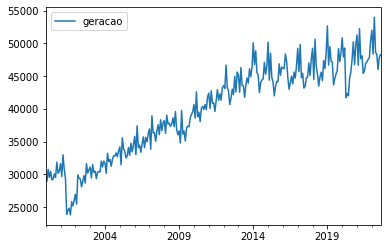

In [27]:
df.plot()

In [45]:
series = TimeSeries.from_dataframe(df)
train,test = series[:-60],series[-60:]

In [46]:
model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(test), num_samples=1000)

C:\Users\aruav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


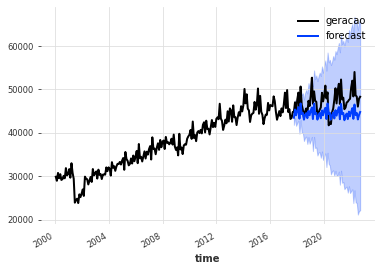

In [49]:
series.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()